# Data Driven Business project

-
- Jack Pieper
- Rick van der Kleij
- Mathijs de Jong (V2B)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from cleaning import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from customAccuracy import *

### Importeren dataset

In [2]:
# Load the data
df = load_data('sap_storing_data_hu_project.csv')

# Data understanding

In [3]:
df.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_mon_nr__statuscode,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,...,stm_fh_duur,stm_reactie_duur,stm_status_sapnaarmon,stm_schadenr,stm_rapportage_maand,stm_rapportage_jaar,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_vervallen_ind
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,326841.000000,741568.000000,6.057210e+05,...,898488.000000,8.984880e+05,326426.000000,7.617200e+05,898526.000000,898526.000000,898526.000000,898526.000000,8.985260e+05,898526.000000
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,4.489137,321.455539,1.062666e+07,...,923.148771,8.845657e+07,1.228597,9.375142e+06,6.636797,2013.259139,0.630154,129220.532107,7.288544e+06,0.014005
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,2.911721,270.687469,4.755891e+05,...,6404.546787,2.712747e+08,0.479859,1.447590e+09,3.403174,3.643254,0.482763,166867.221302,4.569528e+06,0.117512
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000001e+07,...,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,2006.000000,0.000000,0.000000,2.498014e+06,0.000000
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,2.000000,79.000000,1.021172e+07,...,11.000000,1.800000e+01,1.000000,0.000000e+00,4.000000,2010.000000,0.000000,1518.000000,3.673258e+06,0.000000
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,6.000000,203.000000,1.056452e+07,...,84.000000,6.700000e+01,1.000000,0.000000e+00,7.000000,2014.000000,1.000000,36941.000000,3.766232e+06,0.000000
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,7.000000,545.000000,1.092778e+07,...,256.000000,1.318000e+03,1.000000,0.000000e+00,10.000000,2016.000000,1.000000,250780.000000,1.280449e+07,0.000000
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,9.000000,952.000000,3.039590e+07,...,528297.000000,1.060469e+09,3.000000,1.235051e+12,12.000000,2019.000000,1.000000,579394.000000,1.301291e+07,1.000000


# Data cleaning

In [4]:
# Define the columns to drop
columns_to_drop = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld',
                   'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd',
                   'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt',
                   'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz',
                   'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt',
                   'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
                   'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum', 'stm_mon_eind_tijd',
                   'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon', 'stm_fact_jn', 'stm_akkoord_melding_jn',
                   'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd', 'stm_rec_toegev_ddt', 'stm_hinderwaarde',
                   'stm_actie', 'stm_standplaats', 'stm_status_gebr', 'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting',
                   'stm_schade_verhaalb_jn', 'stm_schadenr', 'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig',
                   'stm_relatiervo_volgend', 'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd',
                   'stm_sorteerveld', 'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
                   'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt', 'stm_x_vervallen_ind']

# Drop the unnecessary columns
df = drop_columns(df, columns_to_drop)

# Clean the data (handle missing values, remove columns with excessive NaNs)
df, avg_list, mode_list = clean_data(df)

# Filter de data op rijen met een totale_functiehersteltijd van tussen de 5 mins en 8 uur.
df = filter_data(df)

# Save the cleaned data to a new CSV (optional)
save_data(df, 'final_db_cleaned.csv')

# Display results (optional)
print("Data cleaning complete.")
print("Columns filled with averages: ", avg_list)
print("Columns filled with mode: ", mode_list)
print("Cleaned dataframe shape: ", df.shape)


32798 is type <class 'str'>
50112759 is type <class 'numpy.int64'>
1486679.0 is type <class 'numpy.float64'>
stm_vl_post has been removed (too many missing values)
12/06/2012 20:50:00 is type <class 'str'>
 Lis-Nwh : Alarmoproep baanvak Ledn-Gvm werd ontvangen door treinen Ledn- Lis. sp-LF is type <class 'str'>
Lis-Nwh : Alarmoproep baanvak Ledn-Gvm w is type <class 'str'>
104.0 is type <class 'str'>
104.0 is type <class 'numpy.float64'>
11347071.0 is type <class 'numpy.float64'>
WISSEL is type <class 'str'>
132 Hlb wl 437B  51.741 is type <class 'str'>
0.0 is type <class 'numpy.float64'>
0.0 is type <class 'numpy.float64'>
9.0 is type <class 'numpy.float64'>
MAFS is type <class 'str'>
13/06/2012 05:02:00 is type <class 'str'>
01X is type <class 'str'>
104.0 is type <class 'str'>
104.0 is type <class 'numpy.float64'>
stm_equipm_nr_gst has been removed (too many missing values)
stm_equipm_soort_gst has been removed (too many missing values)
stm_equipm_omschr_gst has been removed (too ma

In [5]:
# Converteer prognose invoer kolommen naar bruikbare datetime objecten.
df['stm_progfh_in_invoer_dat'] = pd.to_datetime(df['stm_sap_meld_ddt'].dt.date)
df['stm_progfh_in_invoer_tijd'] = pd.to_timedelta(df['stm_progfh_in_invoer_tijd'])

# Maak een nieuwe kolom voor het tijdstip waarop de aannemer zijn prognose invult.
df['prognose_invoer_tijdstip'] = df['stm_progfh_in_invoer_dat'] + df['stm_progfh_in_invoer_tijd']

# Maak een nieuwe kolom aan voor de targetvariabele, de tijd tussen het invullen van de prognose door de aannemer en functieherstel.
df['target'] = df['totale_functiehersteltijd'] - (df['prognose_invoer_tijdstip'] - df['stm_sap_meld_ddt'])
# Zorg ervoor dat de targetvariabele altijd 0 dagen heeft (de berekeningen hierboven kunnen leiden tot een target value dat 1 dag te hoog is.)
df['target'] = df['target'].apply(lambda x: pd.Timedelta(hours=x.seconds // 3600, minutes=(x.seconds // 60) % 60, seconds=x.seconds % 60))

# Verwijder alle rijen met een negatieve target. In deze gevallen heeft de aannemer zijn prognose na het functieherstel ingevuld, en is de data niet te gebruiken om op te trainen.
df = df[df['target'] >= pd.Timedelta(0)]

In [6]:
# Testen
df[['stm_sap_meld_ddt', 'stm_fh_ddt', 'prognose_invoer_tijdstip', 'totale_functiehersteltijd', 'target']].sample(10)

,stm_sap_meld_ddt,stm_fh_ddt,prognose_invoer_tijdstip,totale_functiehersteltijd,target
14640,2017-06-08 20:47:38,2017-06-08 22:21:01,2017-06-08 22:27:26,0 days 01:33:23,0 days 23:53:35
149142,2008-11-21 10:49:00,2008-11-21 11:09:00,2008-11-21 11:11:53,0 days 00:20:00,0 days 23:57:07
458656,2015-10-12 05:59:00,2015-10-12 06:16:00,2015-10-12 06:57:52,0 days 00:17:00,0 days 23:18:08
553251,2018-01-24 07:57:46,2018-01-24 09:29:42,2018-01-24 08:43:30,0 days 01:31:56,0 days 00:46:12
188969,2010-01-24 11:55:00,2010-01-24 13:52:00,2010-01-24 09:36:48,0 days 01:57:00,0 days 04:15:12
544604,2017-08-29 15:51:38,2017-08-29 16:29:01,2017-08-29 16:29:45,0 days 00:37:23,0 days 23:59:16
58911,2019-05-17 21:29:14,2019-05-17 22:57:01,2019-05-17 22:41:02,0 days 01:27:47,0 days 00:15:59
555869,2018-03-15 10:06:51,2018-03-15 12:58:00,2018-03-15 14:55:52,0 days 02:51:09,0 days 22:02:08
420456,2014-11-23 21:57:00,2014-11-24 01:20:00,2014-11-23 01:07:55,0 days 03:23:00,0 days 00:12:05
277793,2012-09-24 05:31:00,2012-09-24 11:15:00,2012-09-24 10:47:26,0 days 05:44:00,0 days 00:27:34


In [46]:
# Inspecteer de unieke waarden in de kolommen
print("Unieke waarden in stm_geo_mld:")
print(df['stm_geo_mld'].unique())
print("Unieke waarden in stm_sap_meldtijd:")
print(df['stm_sap_meldtijd'].unique())

# Omzetten van stm_geo_mld naar numeriek
df['stm_geo_mld'] = pd.to_numeric(df['stm_geo_mld'], errors='coerce')
nan_count_geo_mld = df['stm_geo_mld'].isnull().sum()
print(f"Aantal NaN-waarden in stm_geo_mld: {nan_count_geo_mld}")

# Vul NaN-waarden in stm_geo_mld met de gemiddelde waarde
df['stm_geo_mld'].fillna(df['stm_geo_mld'].mean(), inplace=True)

# Tijd omzetten naar seconden voor stm_sap_meldtijd
def time_to_seconds(t):
    # Controleer of de waarde niet leeg of NaN is
    if pd.notnull(t) and t != '':
        # Probeer de tijdstring te splitsen en om te zetten naar int
        try:
            h, m, s = map(int, t.split(':'))
            return h * 3600 + m * 60 + s
        except ValueError:
            return np.nan  # Retourneer NaN bij een fout
    return np.nan  # Retourneer NaN als de waarde leeg is

# Pas de functie toe op de kolom stm_sap_meldtijd
df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].apply(time_to_seconds)

# Controleer de types van de kolommen in de dataset
print("Kolomtypes na cleaning:")
print(df.dtypes)

Unieke waarden in stm_geo_mld:
[152.        553.         63.        817.        119.        107.
 112.        520.        560.         62.        519.        309.
 545.         57.        104.        127.         85.        133.
 625.         60.        544.        818.        564.         67.
  59.        851.        518.        130.        561.         70.
 536.        120.        123.        504.        557.        131.
  64.        801.        661.        563.        823.        551.
 121.        534.        103.        122.        852.        559.
  66.         71.         58.        126.        521.        433.
 228.        565.        822.        814.         72.         65.
 146.        143.        542.        212.        203.        522.
  96.         43.        543.        532.        586.        924.
  28.        617.        206.        490.        486.        115.
 201.         36.        217.        552.        117.        514.
   9.        501.        541.        950.    

C:\Users\rlmkl\AppData\Local\Temp\ipykernel_9944\3060703141.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stm_geo_mld'].fillna(df['stm_geo_mld'].mean(), inplace=True)


Kolomtypes na cleaning:
Unnamed: 0                           object
#stm_sap_meldnr                       int64
stm_mon_nr                          float64
stm_sap_meld_ddt             datetime64[ns]
stm_sap_meldtekst_lang               object
                                 ...       
target                      timedelta64[ns]
baseline_fh_duur                    float64
difference                          float64
correct_prediction                     bool
stm_progfh_in_duur_clean            float64
Length: 67, dtype: object


# Baseline model

In [7]:
# Updated function to handle both scalar and array return types
def mode_per_group(group):
    mode_result = stats.mode(group, keepdims=True)  # Ensure it returns in an array-like format
    return mode_result.mode[0]  # Safely access the mode value

# Calculate baseline (mode) for each oorzaak code
baseline_modes = df.groupby('stm_oorz_code')['stm_fh_duur'].apply(mode_per_group).reset_index()
baseline_modes.columns = ['stm_oorz_code', 'baseline_fh_duur']

# Merge baseline values with the original DataFrame
df = df.merge(baseline_modes, on='stm_oorz_code')

# Calculate the difference between actual time and baseline (mode)
df['difference'] = df['stm_fh_duur'] - df['baseline_fh_duur']

In [8]:
# Mean Absolute Error (MAE)
mae = df['difference'].abs().mean()
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 89.88614494740474


In [9]:
# Check if the baseline prediction matches the actual time
df['correct_prediction'] = df['stm_fh_duur'] == df['baseline_fh_duur']

# Calculate the accuracy in percentage
accuracy = df['correct_prediction'].mean() * 100

# Print the accuracy
print(f'Accuracy of the baseline model: {accuracy:.2f}%')


Accuracy of the baseline model: 1.25%


In [15]:
# Verwijder spaties aan het begin en einde van de waarden
df['stm_progfh_in_duur_clean'] = df['stm_progfh_in_duur'].str.strip()

# Vervang ongeldige waarden door NaN en converteer naar numeriek
df['stm_progfh_in_duur_clean'] = pd.to_numeric(df['stm_progfh_in_duur_clean'], errors='coerce')

# Vul NaN-waarden in met de gemiddelde waarde (zonder inplace=True)
df['stm_progfh_in_duur_clean'] = df['stm_progfh_in_duur_clean'].fillna(df['stm_progfh_in_duur_clean'].mean())

Mean Squared Error: 46822.91673422645
R² waarde: -0.0006522990295447784


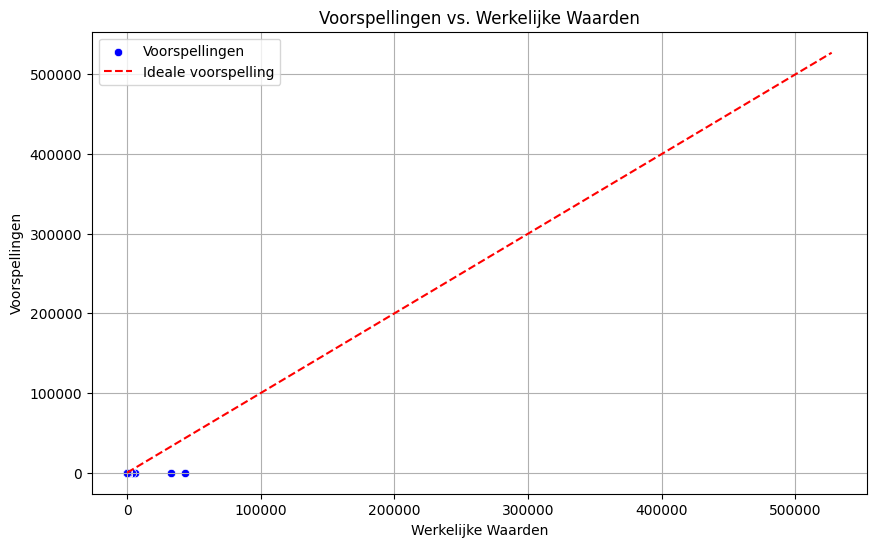

In [16]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineair regressiemodel aanmaken
model = LinearRegression()

# Train het model
model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred = model.predict(X_test)

# Bereken de evaluatiestatistieken
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}') 
print(f'R² waarde: {r2}') 

# Plot de voorspellingen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Voorspellingen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideale voorspelling')
plt.title('Voorspellingen vs. Werkelijke Waarden')
plt.xlabel('Werkelijke Waarden')
plt.ylabel('Voorspellingen')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error van Decision Tree: 45296.61154131301
R² waarde van Decision Tree: 0.03196636095224892


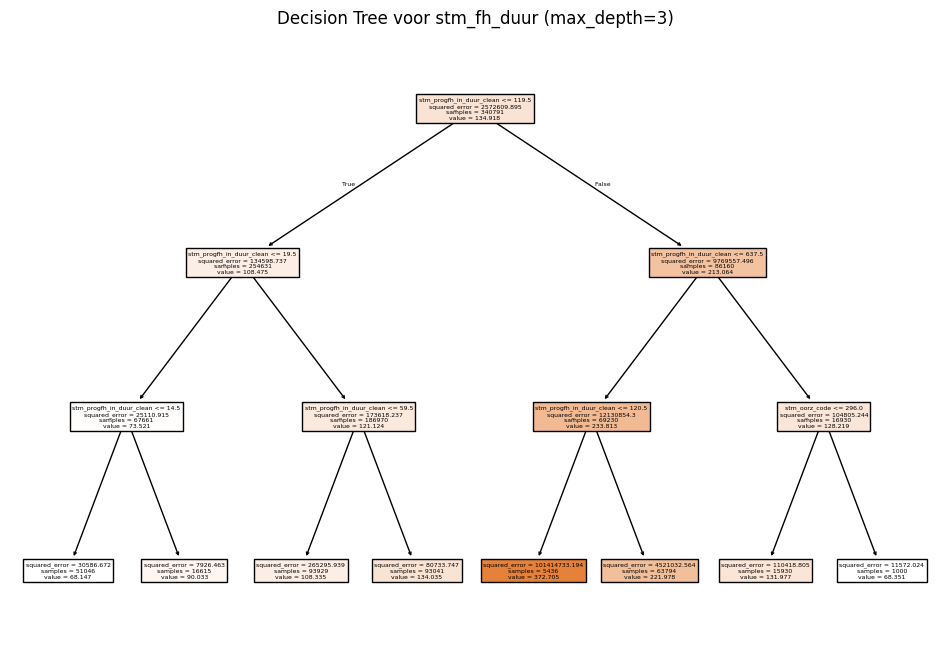

In [17]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor aanmaken met beperkte diepte
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_dt = dt_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error van Decision Tree: {mse_dt}') 
print(f'R² waarde van Decision Tree: {r2_dt}') 

# Visualiseer de Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title('Decision Tree voor stm_fh_duur (max_depth=3)')
plt.show()


Mean Squared Error van Decision Tree: 364110.49140706274
R² waarde van Decision Tree: -6.781403332802734
Nauwkeurigheid van Decision Tree binnen ±10 minuten: 12.21%


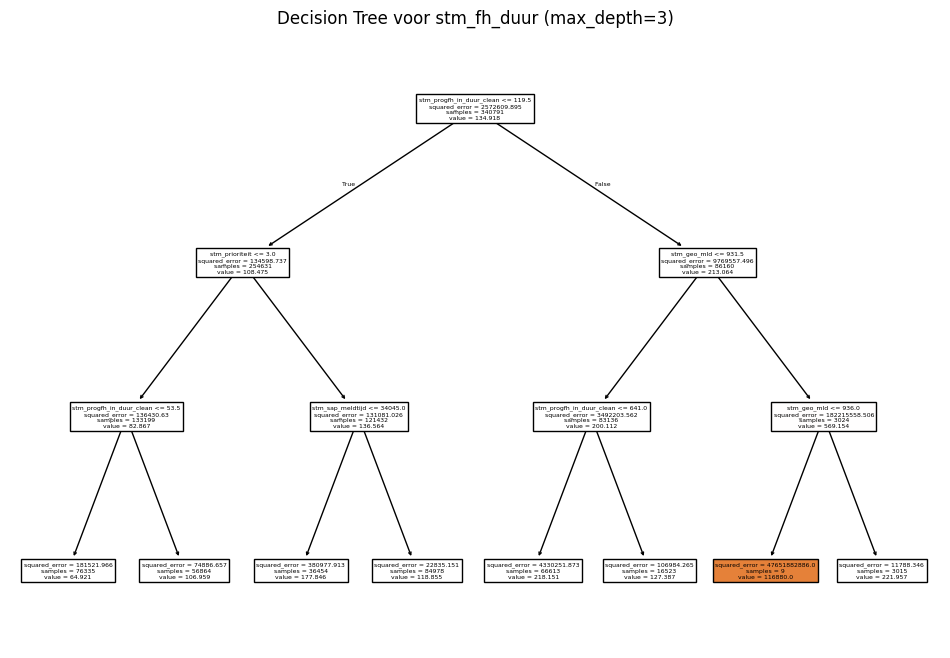

In [55]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code', 'stm_geo_mld', 'stm_prioriteit', 'stm_sap_meldtijd']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor aanmaken met beperkte diepte
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Maak voorspellingen op de testset
y_pred_dt = dt_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error van Decision Tree: {mse_dt}') 
print(f'R² waarde van Decision Tree: {r2_dt}') 

# Gebruik de functie om de nauwkeurigheid met een specifieke tolerantie te berekenen
tolerance_minutes = 10  # Stel de tolerantie in minuten in
accuracy = custom_accuracy(y_test, y_pred_dt, tolerance_minutes)
print(f'Nauwkeurigheid van Decision Tree binnen ±{tolerance_minutes} minuten: {accuracy:.2f}%')

# Visualiseer de Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title('Decision Tree voor stm_fh_duur (max_depth=3)')
plt.show()


Beste hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Mean Squared Error van Random Forest: 214297.35115906337
R² waarde van Random Forest: -3.5797475268453303
Nauwkeurigheid van Random Forest binnen ±10 minuten: 20.17%


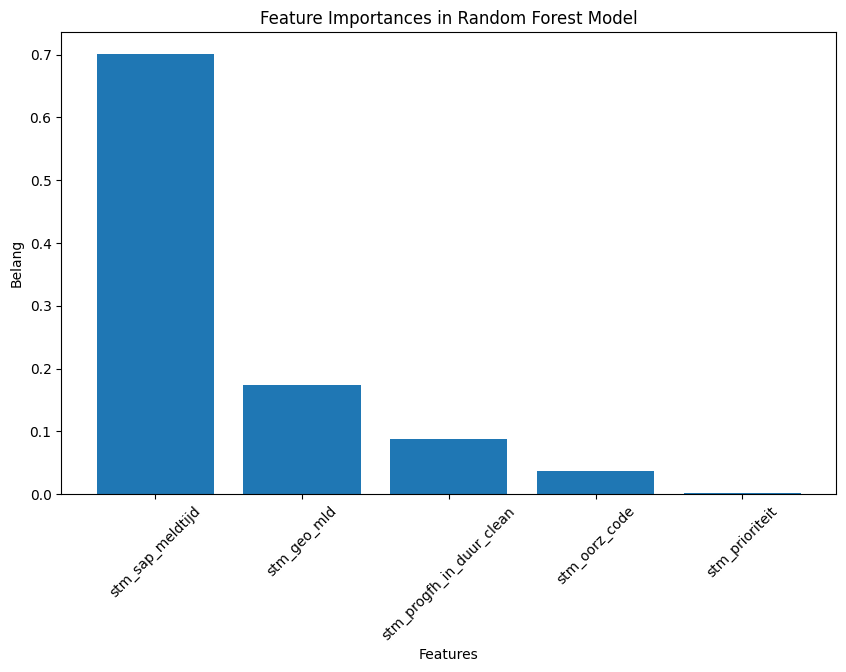

In [58]:
# Onafhankelijke variabelen (X) en afhankelijke variabele (y)
X = df[['stm_progfh_in_duur_clean', 'stm_oorz_code', 'stm_geo_mld', 'stm_prioriteit', 'stm_sap_meldtijd']]
y = df['stm_fh_duur']

# Splitsen van de dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instellen van de parameters voor Grid Search
param_grid = {
    'max_depth': [3, 5, 10, 20],  # Verschillende diepten van de bomen
    'n_estimators': [100],  # We houden het aantal estimators constant op 100
}

# Grid Search aanmaken
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Train het model met Grid Search
grid_search.fit(X_train, y_train)

# Beste model en parameters
best_rf_model = grid_search.best_estimator_
print(f'Beste hyperparameters: {grid_search.best_params_}')

# Maak voorspellingen op de testset met het beste model
y_pred_rf = best_rf_model.predict(X_test)

# Bereken de evaluatiestatistieken
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error van Random Forest: {mse_rf}')
print(f'R² waarde van Random Forest: {r2_rf}')

# Gebruik de functie om de nauwkeurigheid met een specifieke tolerantie te berekenen
tolerance_minutes = 10  # Stel de tolerantie in minuten in
accuracy_rf = custom_accuracy(y_test, y_pred_rf, tolerance_minutes)
print(f'Nauwkeurigheid van Random Forest binnen ±{tolerance_minutes} minuten: {accuracy_rf:.2f}%')

# Belangrijkste kenmerken van het model plotten
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Belang")
plt.show()